In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# 1.2 Filtered Boston housing and kernels

## 1.2.4: Baseline vs full linear regression

In [2]:
def get_train_test_data():
    df = pd.read_csv("boston_data.csv")
    df_train = df.sample(frac=2.0/3)
    df_test = df.drop(df_train.index)

    df_train = df_train.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    X_train = df_train.drop("MEDV", axis=1).to_numpy()
    y_train = df_train["MEDV"].to_numpy()

    X_test = df_test.drop("MEDV", axis=1).to_numpy()
    y_test = df_test["MEDV"].to_numpy()

    return X_train, y_train, X_test, y_test

### Part (a) - Linear regression with constant function.

In [3]:

def constant_regression():
    """Fits a constant to the data set using linear regression"""

    mse_train_values = []
    mse_test_values = []

    for _ in range(20):

        X_train, y_train, X_test, y_test = get_train_test_data()

        m_train, m_test = len(X_train), len(X_test)

        phi_train = np.ones(m_train).reshape(-1, 1)

        a = np.linalg.lstsq(phi_train, y_train)[0] # best fit constant
        mse_train = (1.0/m_train) * np.linalg.norm(np.dot(phi_train, a) - y_train)**2
        mse_train_values.append(mse_train)

        phi_test = np.ones(m_test).reshape(-1, 1)

        mse_test = (1.0/m_test) * np.linalg.norm(np.dot(phi_test, a) -  y_test)**2
        mse_test_values.append(mse_test)

    return np.mean(mse_train_values), np.std(mse_train_values), np.mean(mse_test_values), np.std(mse_test_values)


mse_train, std_train, mse_test, std_test = constant_regression()
print(f"MSE train: {mse_train}")
print(f"STDEV train: {std_train}")
print(f"MSE test:  {mse_test}")
print(f"STDEV test: {std_test}")

MSE train: 83.72270677737762
STDEV train: 5.39244412617478
MSE test:  86.02517059519272
STDEV test: 10.905187345425304


### Part (c) - Linear regression with a single attribute

In [4]:

def single_attribute_regression(index):
    """Does linear regression with a bias term with a single attribute given by the index. """
    
    mse_train_values = []
    mse_test_values = []

    for _ in range(20):

        X_train, y_train, X_test, y_test = get_train_test_data()
        m_train, m_test = len(X_train), len(X_test)

        X_train = X_train[:, index]
        phi_train = np.column_stack((X_train, np.ones_like(X_train)))
        

        X_test = X_test[:, index]
        phi_test = np.column_stack((X_test, np.ones_like(X_test)))

        w = np.linalg.lstsq(phi_train, y_train)[0] # best fit weight vector
        mse_train = (1.0/m_train) * np.linalg.norm(np.dot(phi_train, w) - y_train)**2
        mse_train_values.append(mse_train)

        mse_test = (1.0/m_test) * np.linalg.norm(np.dot(phi_test, w) -  y_test)**2
        mse_test_values.append(mse_test)

    return np.mean(mse_train_values), np.std(mse_train_values), np.mean(mse_test_values), np.std(mse_test_values)


for i in range(12):
    print(f"Regressing on variable {i+1}")
    mse_train, std_train, mse_test, std_test = single_attribute_regression(i)
    print(f"MSE train: {mse_train}")
    print(f"STDEV train: {std_train}")
    print(f"MSE test:  {mse_test}")
    print(f"STDEV test: {std_test}")
    print("\n\n")


Regressing on variable 1
MSE train: 70.54612334122686
STDEV train: 5.193005220961333
MSE test:  74.56436934640853
STDEV test: 10.543999620626689



Regressing on variable 2
MSE train: 73.50564758090903
STDEV train: 6.044326515636394
MSE test:  73.88014103086165
STDEV test: 12.009414554263431



Regressing on variable 3
MSE train: 65.92867128395982
STDEV train: 4.154914488407365
MSE test:  62.438590617102214
STDEV test: 8.31669682814444



Regressing on variable 4
MSE train: 81.16908556296444
STDEV train: 4.887928265025482
MSE test:  83.65297965557485
STDEV test: 9.82035376856938



Regressing on variable 5
MSE train: 69.61620396469681
STDEV train: 4.409639750762324
MSE test:  68.11952145358775
STDEV test: 8.669229713123453



Regressing on variable 6
MSE train: 43.28231758050203
STDEV train: 2.7348950792586435
MSE test:  44.6376591218329
STDEV test: 5.435565024411531



Regressing on variable 7
MSE train: 72.14396287116269
STDEV train: 7.17818185298959
MSE test:  73.62090043480165
STDE

### Part (d) - Linear regression with all variables

In [5]:
def all_attributes_regression():
    """Does linear regression with a bias term with a single attribute given by the index. """
    
    mse_train_values = []
    mse_test_values = []

    for _ in range(20):

        X_train, y_train, X_test, y_test = get_train_test_data()
        m_train, m_test = len(X_train), len(X_test)
        phi_train = np.column_stack((X_train, np.ones(m_train)))

        w = np.linalg.lstsq(phi_train, y_train)[0] 
        mse_train = (1.0/m_train) * np.linalg.norm(np.dot(phi_train, w) - y_train)**2
        mse_train_values.append(mse_train)

        phi_test = np.column_stack((X_test, np.ones(m_test)))
        mse_test = (1.0/m_test) * np.linalg.norm(np.dot(phi_test, w) -  y_test)**2
        mse_test_values.append(mse_test)
    
    return np.mean(mse_train_values), np.std(mse_train_values), np.mean(mse_test_values), np.std(mse_test_values)

mse_train, std_train, mse_test, std_test = all_attributes_regression()

print(f"MSE train: {mse_train}")
print(f"STDEV train: {std_train}")
print(f"MSE test:  {mse_test}")
print(f"STDEV test: {std_test}")


MSE train: 21.468342680230634
STDEV train: 1.9597995190228361
MSE test:  25.760286832987997
STDEV test: 4.410918579443406


# 1.3.5 Filtered Boston housing and kernels

In [ ]:
class KRR:
    def __init__(self, X_train, y_train):
        self.pairwise_norm = self._get_pairwise_norm(X_train)
        self.X_train = X_train
        self.y_train = y_train
        
    def _get_pairwise_norm(self, X_train):
        m = len(X_train)
        M = np.zeros((m, m))
        for i in range(m):
            for j in range(m):
                M[i, j] = np.linalg.norm(X_train[i] - X_train[j])
        return M

    def get_alpha(self, gamma, sigma):
        m = len(self.y_train)
        K = np.exp(-((self.pairwise_norm/sigma)**2)/2.0)
        M = K + gamma * m * np.identity(m)
        alpha = np.linalg.solve(M, self.y_train)
        return alpha
        
    def predict(self, X_test, gamma, sigma):
        alpha = self.get_alpha(gamma, sigma)
        diff = self.X_train[:, None, :] - X_test[None, :, :] # diff[i][j] = X_train[i] - X_test[j]
        norms = np.linalg.norm(diff, axis=2) # norms[i][j] = ||X_train[i] - X_test[j]||

        k = np.exp(-((norms/sigma)**2)/2)

        y_preds = np.dot(alpha, k) # dots alpha with each column of norms

        return y_preds

    def get_mse(self, X_test, y_test, gamma, sigma):
        y_preds = self.predict(X_test, gamma, sigma)
    
        return (np.linalg.norm(y_preds - y_test)**2)/len(X_test)        

### Part (a) - Hyperparameter optimisation of sigma and gamma

In [ ]:
def get_cross_validation_error(folds_X, folds_y, gamma, sigma):
    """Does cross validation on the given folds using the given parameters for kernel ridge regression. Returns the average MSE across all folds."""

    num_folds = len(folds_X)

    errors = []

    for i in range(num_folds):
        fold_X_test = folds_X[i]
        fold_y_test = folds_y[i]
        fold_X_train = np.concatenate([folds_X[j] for j in range(num_folds) if j != i])
        fold_y_train = np.concatenate([folds_y[j] for j in range(num_folds) if j != i])
        krr = KRR(fold_X_train, fold_y_train)
        errors.append(krr.get_mse(fold_X_test, fold_y_test, gamma, sigma))

    return np.mean(errors)


def get_best_params(X_train, y_train, gammas, sigmas):
    """Gets the best pair of values (gamma, sigma) to use for ridge regression.
    by doing five-fold validation on the given training data."""

    num_folds = 5
    
    folds_X = np.array_split(X_train, num_folds)
    folds_y = np.array_split(y_train, num_folds)

    min_cross_error = np.inf

    best_gamma, best_sigma = 0, 0

    errors = np.zeros(shape=(len(gammas), len(sigmas))) # errors[i][j] = cross validation error using gammas[i] and sigmas[j]

    for i, gamma in enumerate(gammas):
        for j, sigma in enumerate(sigmas):
            cross_error = get_cross_validation_error(folds_X, folds_y, gamma, sigma)
            if cross_error < min_cross_error:
                min_cross_error = cross_error
                best_gamma, best_sigma = gamma, sigma
            
            errors[i][j] = cross_error

    return best_gamma, best_sigma, errors

def kernelised_ridge_regression():
    """Does kernelised ridge regression using best gamma and sigma values found from cross-fold validation."""

    gammas = 2.0 ** np.arange(-40, -25)
    sigmas = 2.0 ** np.arange(7.0, 13.1, 0.5)

    def get_mses():

        X_train, y_train, X_test, y_test = get_train_test_data()

        gamma, sigma, _ = get_best_params(X_train, y_train, gammas, sigmas)

        krr = KRR(X_train, y_train)

        mse_train = krr.get_mse(X_train, y_train, gamma, sigma)

        mse_test = krr.get_mse(X_test, y_test, gamma, sigma)

        print(mse_train, mse_test)

        return mse_train, mse_test
    
    
    mses = [get_mses() for _ in range(20)]
    mse_lists = list(zip(*mses))

    mse_train_values, mse_test_values = mse_lists[0], mse_lists[1]
    
    return np.mean(mse_train_values), np.std(mse_train_values), np.mean(mse_test_values), np.std(mse_test_values)

kernelised_ridge_regression()

8.939404905330989 8.453636939909309
4.19696067998998 16.140535029432005
8.168338580915906 12.116106882491826
8.945427704669074 10.848542785482021
6.967302302160793 12.989803833438497
5.84879185171167 11.757213938627277
11.73422251365772 11.876751662063674
8.013955015776364 15.473956476605007
5.524678205777171 13.610239915488195
9.698732198149594 9.254056470466583
8.688713017399486 10.755246664784421
10.111430630013912 9.068993143626216
8.351584594330498 10.893629044281283
7.458967585202197 13.344337727952906
6.622811160601709 14.183759326314425
6.10457180809879 15.068350425210342
8.251919918243624 12.163379741524864
8.989549307006214 7.317345080329343
6.962524526372646 14.355821285908673
7.095484554354147 13.549168931232481


(np.float64(7.833768552988126),
 np.float64(1.705022737291982),
 np.float64(12.161043765258468),
 np.float64(2.356432822914555))

### Part (b) - Plot of cross-validation error for different values of sigma and gamma

In [8]:
# get best here and plot in this cell then without calling again use best values to fgind test and train mse values 
X_train, y_train, X_test, y_test = get_train_test_data()

gammas = 2.0 ** np.arange(-40, -25)
sigmas = 2.0 ** np.arange(7.0, 13.1, 0.5)

gamma, sigma, errors = get_best_params(X_train, y_train, gammas, sigmas)

print(f"Best gamma: {gamma}")
print(f"Best sigma: {sigma}")

Best gamma: 2.9103830456733704e-11
Best sigma: 724.0773439350247


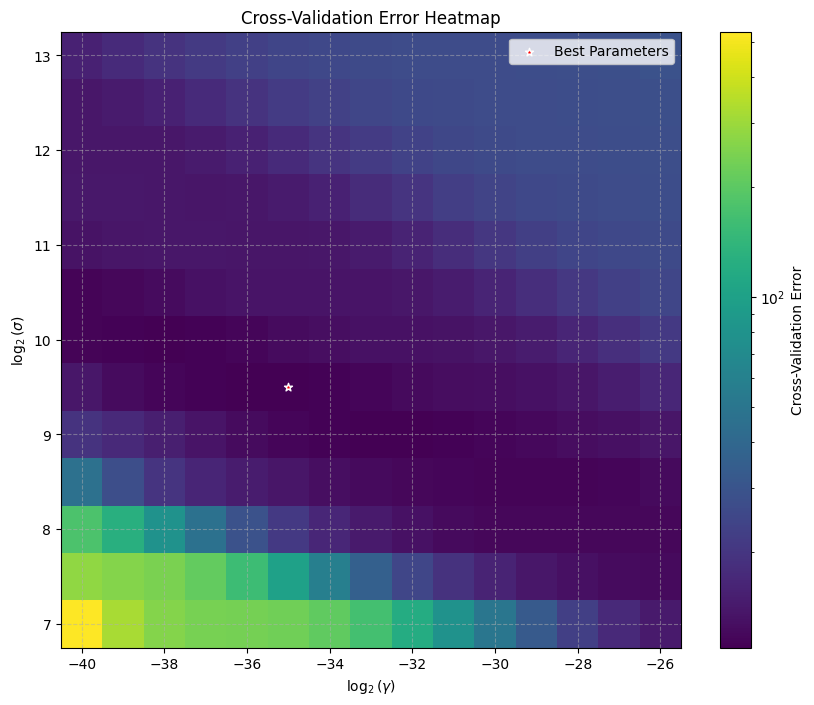

In [9]:
import matplotlib.colors as colors

# plotting log of gammas and sigmas for better visualisation
gammas_log = np.arange(-40, -25)      
sigmas_log = np.arange(7.0, 13.1, 0.5) 

min_error = np.min(errors)
max_error = np.max(errors)
norm_log = colors.LogNorm(vmin=min_error, vmax=max_error) # makes colour scale logarithmic for clearer view

xx, yy = np.meshgrid(gammas_log, sigmas_log, indexing='ij')

plt.figure(figsize=(10, 8))

plot = plt.pcolormesh(xx, yy, errors, cmap='viridis', shading='nearest', norm=norm_log)

cbar = plt.colorbar(plot, label='Cross-Validation Error')
plt.xlabel('$\\log_2(\\gamma)$')
plt.ylabel('$\\log_2(\\sigma)$')
plt.title('Cross-Validation Error Heatmap')

plt.scatter(np.log2(gamma),  np.log2(sigma), marker='*', c='red', edgecolor='white', linewidth=1, label='Best Parameters')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)


### Part (c) - Test/train MSE for best sigma and gamma

In [10]:
krr = KRR(X_train, y_train)

mse_train = krr.get_mse(X_train, y_train, gamma, sigma)
mse_test = krr.get_mse(X_test, y_test, gamma, sigma)

print(f"MSE train: {mse_train}")
print(f"MSE test: {mse_test}")

MSE train: 6.350565771928299
MSE test: 11.723538877318633


### Part (d) - Test/train MSE for all the above methods averaged for 20 runs!

In [11]:
mse_train, std_train, mse_test, std_test = constant_regression()
print("Naive regression")
print(f"MSE train: {mse_train.round(2)} ± {std_train.round(2)}")
print(f"MSE test:  {mse_test.round(2)} ± {std_test.round(2)}")

for i in range(12):
    print("\n")
    print(f"Linear Regression (attribute {i+1})")
    mse_train, std_train, mse_test, std_test = single_attribute_regression(i)
    print(f"MSE train: {mse_train.round(2)} ± {std_train.round(2)}")
    print(f"MSE test:  {mse_test.round(2)} ± {std_test.round(2)}")

print("\n")
print(f"Linear Regression (all attributes)")
mse_train, std_train, mse_test, std_test = all_attributes_regression()
print(f"MSE train: {mse_train.round(2)} ± {std_train.round(2)}")
print(f"MSE test:  {mse_test.round(2)} ± {std_test.round(2)}")

print("\n")
print("Kernel Ridge Regression")
mse_train, std_train, mse_test, std_test = kernelised_ridge_regression()
print(f"MSE train: {mse_train.round(2)} ± {std_train.round(2)}")
print(f"MSE test:  {mse_test.round(2)} ± {std_test.round(2)}")
    
    


Naive regression
MSE train: 83.66 ± 4.69
MSE test:  86.18 ± 9.51


Linear Regression (attribute 1)
MSE train: 71.76 ± 4.42
MSE test:  72.32 ± 8.84


Linear Regression (attribute 2)
MSE train: 72.55 ± 6.07
MSE test:  75.54 ± 12.35


Linear Regression (attribute 3)
MSE train: 64.99 ± 6.69
MSE test:  64.57 ± 13.68


Linear Regression (attribute 4)
MSE train: 80.5 ± 5.12
MSE test:  84.91 ± 10.24


Linear Regression (attribute 5)
MSE train: 67.75 ± 4.85
MSE test:  71.99 ± 9.82


Linear Regression (attribute 6)
MSE train: 42.8 ± 3.74
MSE test:  45.76 ± 7.53


Linear Regression (attribute 7)
MSE train: 71.31 ± 6.4
MSE test:  75.05 ± 12.96


Linear Regression (attribute 8)
MSE train: 79.8 ± 5.18
MSE test:  78.29 ± 10.5


Linear Regression (attribute 9)
MSE train: 70.56 ± 4.52
MSE test:  75.69 ± 9.1


Linear Regression (attribute 10)
MSE train: 65.44 ± 5.41
MSE test:  67.3 ± 10.8


Linear Regression (attribute 11)
MSE train: 61.69 ± 2.98
MSE test:  65.11 ± 6.19


Linear Regression (attribute 12